# 참고

사실상 본 글은 다음 사이트의 내용 및 코드를 보고 따라한 것에 불과한 글임<br>
http://benjaminarjun.com/crime-analysis/

# 데이터 호출

In [2]:
# 데이터 호출
import pandas as pd

train = pd.read_csv('train_SFC.csv',parse_dates=['Dates'])
test = pd.read_csv('test_SFC.csv',parse_dates=['Dates'],index_col='Id')
sample_submission = pd.read_csv('sampleSubmission_SFC.csv')

In [3]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [4]:
sample_submission

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,884257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884258,884258,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884259,884259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
884260,884260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 6 columns):
Dates         884262 non-null datetime64[ns]
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 47.2+ MB


In [7]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 40 columns):
Id                             884262 non-null int64
ARSON                          884262 non-null int64
ASSAULT                        884262 non-null int64
BAD CHECKS                     884262 non-null int64
BRIBERY                        884262 non-null int64
BURGLARY                       884262 non-null int64
DISORDERLY CONDUCT             884262 non-null int64
DRIVING UNDER THE INFLUENCE    884262 non-null int64
DRUG/NARCOTIC                  884262 non-null int64
DRUNKENNESS                    884262 non-null int64
EMBEZZLEMENT                   884262 non-null int64
EXTORTION                      884262 non-null int64
FAMILY OFFENSES                884262 non-null int64
FORGERY/COUNTERFEITING         884262 non-null int64
FRAUD                          884262 non-null int64
GAMBLING                       884262 non-null int64
KIDNAPPING                     884262 non

# 데이터 전처리(결측치/이상치 처리)

In [8]:
# 중복행 확인
train.duplicated().sum()

# 2323개의 중복행이 존재해 제거해줘야 함

2323

In [9]:
import geopandas as gpd
from shapely.geometry import Point

def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf['Coordinates'] = gdf['Coordinates'].apply(Point)
    gdf = gpd.GeoDataFrame(gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(train)
train_gdf

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,POINT (-122.42436 37.80041)
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,POINT (-122.42700 37.80087)
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,POINT (-122.43874 37.77154)
...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,POINT (-122.45903 37.71406)
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,POINT (-122.44736 37.73195)
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,POINT (-122.40339 37.78027)
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,POINT (-122.39053 37.78061)


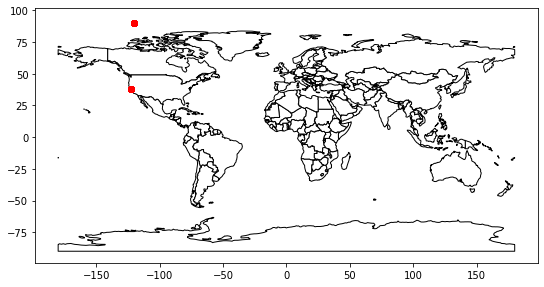

In [12]:
# San Francisco 지역의 범죄에 대한 데이터인데 지역 밖에 찍힌 데이터가 존재함. 즉, 이상치 존재.
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
f, ax = plt.subplots(1, figsize=(9,9))
ax = world.plot(color='white', edgecolor='black', ax=ax)
train_gdf.plot(ax=ax, color='red');

In [13]:
train_gdf[train_gdf.Y > 75].count()[0]

# 총 67개의 데이터의 좌표가 잘못되어 있음. 제거할지, 대체할지 생각해봐야 함.

67

In [14]:
# 2323개의 중복행 제거
train.drop_duplicates(inplace=True)
train

# 878049 rows × 9 columns → 875726 rows × 9 columns

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [15]:
# 67개의 이상치를 우선 NaN 값으로 대체
import numpy as np
train.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
test.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)

# 67개의 NaN 값에 평균값 생성
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [16]:
# 67개의 NaN 값에 평균값 대입
for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict']==district, ['X', 'Y']] = imputer.fit_transform(
        train.loc[train['PdDistrict']==district, ['X', 'Y']])
    
    # fit은 train 데이터로 해주었기때문에 transform만 적용
    # → fit_trarnsform을 적용할 경우, test 데이터로 fit을 하게 되어 overfitting이 일어날 수 있음
    test.loc[test['PdDistrict']==district, ['X', 'Y']] = imputer.transform( 
        test.loc[test['PdDistrict']==district, ['X', 'Y']])    
    
train_gdf = create_gdf(train)
train_gdf

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,POINT (-122.42436 37.80041)
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,POINT (-122.42700 37.80087)
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,POINT (-122.43874 37.77154)
...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,POINT (-122.45903 37.71406)
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,POINT (-122.44736 37.73195)
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,POINT (-122.40339 37.78027)
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,POINT (-122.39053 37.78061)


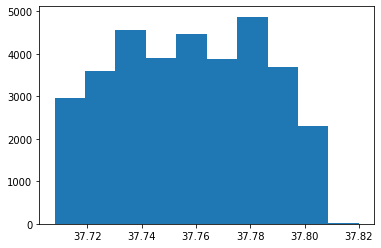

In [37]:
# 이상치 처리 확인
common_Y = list(train.groupby('Y').count().iloc[:, 0].index)
plt.hist(common_Y)
plt.show()

In [28]:
train['Date'] = train['Dates'].dt.date # 날짜
train['Year'] = train['Dates'].dt.year # 년
train['Month'] = train['Dates'].dt.month # 월
train['Day'] = train['Dates'].dt.day # 일
train['Hour'] = train['Dates'].dt.hour # 시간

# 범죄 유형 탐색

In [29]:
common_categories = train.groupby('Category').count().iloc[:, 0]
common_categories

# ARSON                             방화
# ASSAULT                           폭행
# BAD CHECKS                        불량수표
# BRIBERY                           뇌물 수수
# BURGLARY                          침입절도 
# DISORDERLY CONDUCT                치안문란
# DRIVING UNDER THE INFLUENCE       음주운전
# DRUG/NARCOTIC                     마약
# DRUNKENNESS                       취중
# EMBEZZLEMENT                      횡령
# EXTORTION                         강탈, 강요 
# FAMILY OFFENSES                   가족범죄
# FORGERY/COUNTERFEITING            위조
# FRAUD                             사기
# GAMBLING                          도박
# KIDNAPPING                        납치
# LARCENY/THEFT                     절도
# LIQUOR LAWS                       주류 관련 법
# LOITERING                         얼쩡거림
# MISSING PERSON                    실종
# NON-CRIMINAL                      비범죄
# OTHER OFFENSES                    기타 범죄
# PORNOGRAPHY/OBSCENE MAT           음란물
# PROSTITUTION                      성매매
# RECOVERED VEHICLE                 견인
# ROBBERY                           강도
# RUNAWAY                           도망
# SECONDARY CODES                   
# SEX OFFENSES FORCIBLE             강제적 성범죄
# SEX OFFENSES NON FORCIBLE         비강제적 성범죄
# STOLEN PROPERTY                   재산 도난
# SUICIDE                           자살
# SUSPICIOUS OCC                
# TREA                          
# TRESPASS                          불법적 침해
# VANDALISM                         공공 기물 파손
# VEHICLE THEFT                     차량 도난
# WARRANTS                          구속영장
# WEAPON LAWS                       무기 관련 법

Category
ARSON                            1512
ASSAULT                         76815
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36600
DISORDERLY CONDUCT               4313
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53919
DRUNKENNESS                      4277
EMBEZZLEMENT                     1164
EXTORTION                         256
FAMILY OFFENSES                   488
FORGERY/COUNTERFEITING          10592
FRAUD                           16637
GAMBLING                          146
KIDNAPPING                       2340
LARCENY/THEFT                  174320
LIQUOR LAWS                      1899
LOITERING                        1207
MISSING PERSON                  25669
NON-CRIMINAL                    91915
OTHER OFFENSES                 125960
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7446
RECOVERED VEHICLE                3132
ROBBERY                         22988
RUN

In [30]:
common_categories.index

Index(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'],
      dtype='object', name='Category')

In [31]:
common_categories.keys() # common_categories.index와 같은 결과 보여줌

# .keys(), .values()는 원래 dictionary에서 적용되는 method인데..
# common_categories는 dictionary는 아닌 것 같고.. 비슷하게 적용되는건가?

Index(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'],
      dtype='object', name='Category')

In [32]:
common_categories.values

array([  1512,  76815,    406,    289,  36600,   4313,   2268,  53919,
         4277,   1164,    256,    488,  10592,  16637,    146,   2340,
       174320,   1899,   1207,  25669,  91915, 125960,     22,   7446,
         3132,  22988,   1894,   9979,   4380,    148,   4537,    508,
        31394,      6,   7318,  44581,  53706,  42145,   8550],
      dtype=int64)

Text(0, 0.5, 'Category')

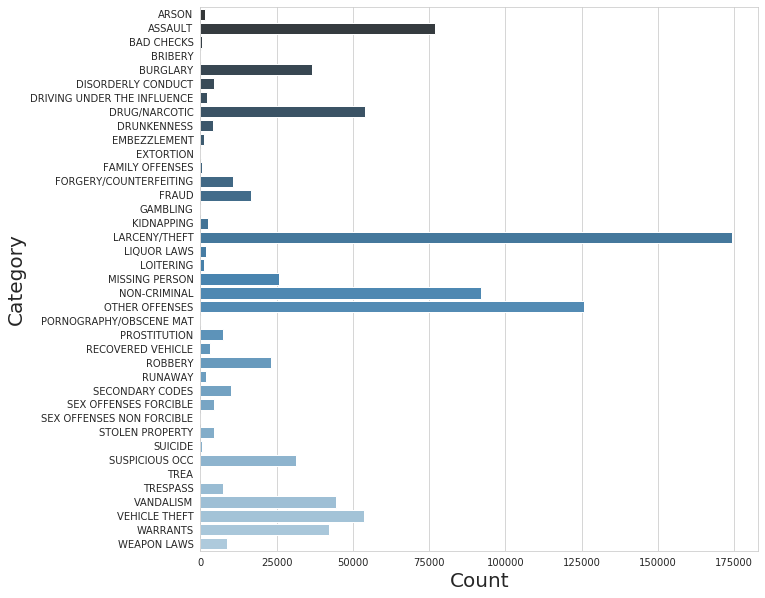

In [33]:
import seaborn as sns
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(1, figsize=(10, 10))
    sns.barplot(
        common_categories.values,
        common_categories.index,
        orient='h',
        palette='Blues_d')

ax.set_xlabel('Count', fontsize=20)
ax.set_ylabel('Category', fontsize=20)

In [35]:
# violent : 가해자가 피해자의 신체, 말, 행위 또는 피해자가 존재하는 공간에 
#           직·간접적으로 "강제적 능동 행위를 한 것"으로 가능성 높게 생각될 경우
violent_cats = ['ASSAULT','BURGLARY','EXTORTION','KIDNAPPING','ROBBERY','SEX OFFENSES FORCIBLE','VANDALISM','VEHICLE THEFT', 
                'WEAPON LAWS']
print(violent_cats)

['ASSAULT', 'BURGLARY', 'EXTORTION', 'KIDNAPPING', 'ROBBERY', 'SEX OFFENSES FORCIBLE', 'VANDALISM', 'VEHICLE THEFT', 'WEAPON LAWS']


In [36]:
# violent로 분류되지 않은 모든 것
nonviolent_cats = ['ARSON','BAD CHECKS','BRIBERY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS',
                   'EMBEZZLEMENT','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING', 'LARCENY/THEFT','LIQUOR LAWS',
                   'LOITERING','MISSING PERSON','NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION',
                   'RECOVERED VEHICLE','RUNAWAY','SECONDARY CODES','SEX OFFENSES, NON FORCIBLE','STOLEN PROPERTY',
                   'SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','WARRANTS']
print(nonviolent_cats)

['ARSON', 'BAD CHECKS', 'BRIBERY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'WARRANTS']


In [38]:
np.unique(common_categories) # 발생건수에 대해 오름차순이 적용된 common_categories.values와 같은 결과를 보여줌

array([     6,     22,    146,    148,    256,    289,    406,    488,
          508,   1164,   1207,   1512,   1894,   1899,   2268,   2340,
         3132,   4277,   4313,   4380,   4537,   7318,   7446,   8550,
         9979,  10592,  16637,  22988,  25669,  31394,  36600,  42145,
        44581,  53706,  53919,  76815,  91915, 125960, 174320],
      dtype=int64)

In [46]:
# 각각의 행이 나눠진 array 생성
crime = np.array(train)
crime

array([[Timestamp('2015-05-13 23:53:00'), 'WARRANTS', 'WARRANT ARREST',
        ..., 5, 13, 23],
       [Timestamp('2015-05-13 23:53:00'), 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 5, 13, 23],
       [Timestamp('2015-05-13 23:33:00'), 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 5, 13, 23],
       ...,
       [Timestamp('2003-01-06 00:01:00'), 'LARCENY/THEFT',
        'GRAND THEFT FROM LOCKED AUTO', ..., 1, 6, 0],
       [Timestamp('2003-01-06 00:01:00'), 'VANDALISM',
        'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', ..., 1, 6, 0],
       [Timestamp('2003-01-06 00:01:00'), 'FORGERY/COUNTERFEITING',
        'CHECKS, FORGERY (FELONY)', ..., 1, 6, 0]], dtype=object)

In [47]:
import csv
violent = np.array([row for row in crime if row[1] in violent_cats])
violent

array([[Timestamp('2015-05-13 23:30:00'), 'VEHICLE THEFT',
        'STOLEN AUTOMOBILE', ..., 5, 13, 23],
       [Timestamp('2015-05-13 23:30:00'), 'VEHICLE THEFT',
        'STOLEN AUTOMOBILE', ..., 5, 13, 23],
       [Timestamp('2015-05-13 22:30:00'), 'VANDALISM',
        'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', ..., 5, 13, 22],
       ...,
       [Timestamp('2003-01-06 00:20:00'), 'ASSAULT',
        'ATTEMPTED HOMICIDE WITH A GUN', ..., 1, 6, 0],
       [Timestamp('2003-01-06 00:15:00'), 'ROBBERY',
        'ROBBERY ON THE STREET WITH A GUN', ..., 1, 6, 0],
       [Timestamp('2003-01-06 00:01:00'), 'VANDALISM',
        'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', ..., 1, 6, 0]],
      dtype=object)

In [49]:
nonviolent = np.array([row for row in crime if row[1] in nonviolent_cats])
nonviolent

array([[Timestamp('2015-05-13 23:53:00'), 'WARRANTS', 'WARRANT ARREST',
        ..., 5, 13, 23],
       [Timestamp('2015-05-13 23:53:00'), 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 5, 13, 23],
       [Timestamp('2015-05-13 23:33:00'), 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 5, 13, 23],
       ...,
       [Timestamp('2003-01-06 00:01:00'), 'LARCENY/THEFT',
        'GRAND THEFT FROM LOCKED AUTO', ..., 1, 6, 0],
       [Timestamp('2003-01-06 00:01:00'), 'LARCENY/THEFT',
        'GRAND THEFT FROM LOCKED AUTO', ..., 1, 6, 0],
       [Timestamp('2003-01-06 00:01:00'), 'FORGERY/COUNTERFEITING',
        'CHECKS, FORGERY (FELONY)', ..., 1, 6, 0]], dtype=object)

In [51]:
print(len(crime))
print(len(violent))
print(len(nonviolent))

875726
250216
625362


In [52]:
print(len(violent)/float(len(crime)))
print(len(nonviolent)/float(len(crime)))

# 발생 범죄의 약 28.6%가 violent로 분류되었음

0.2857240735115778
0.7141069238551785


# 요일에 따른 violent / nonviolent 범죄 발생 추세 파악

In [53]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [54]:
dow_freq = {day:len(crime[crime[:,3]==day]) for day in days}
dow_violent_freq = {day:len(violent[violent[:,3]==day]) for day in days}
dow_nonviolent_freq = {day:len(nonviolent[nonviolent[:,3]==day]) for day in days}

print(dow_freq)
print(dow_violent_freq)
print(dow_nonviolent_freq)

{'Monday': 121303, 'Tuesday': 124603, 'Wednesday': 128829, 'Thursday': 124757, 'Friday': 133371, 'Saturday': 126469, 'Sunday': 116394}
{'Monday': 34455, 'Tuesday': 34065, 'Wednesday': 34758, 'Thursday': 34398, 'Friday': 38849, 'Saturday': 37833, 'Sunday': 35858}
{'Monday': 86825, 'Tuesday': 90515, 'Wednesday': 94049, 'Thursday': 90344, 'Friday': 94494, 'Saturday': 88615, 'Sunday': 80520}


In [55]:
# dow_freq, dow_violent, dow_nonviolent가 dictionary 이므로 np.fromiter(dictionary, dtype=np.int)로써 array로 만들어줌
day_mean = np.mean(np.fromiter(dow_freq.values(), dtype=np.int))
day_violent_mean = np.mean(np.fromiter(dow_violent_freq.values(), dtype=np.int))
day_nonviolent_mean = np.mean(np.fromiter(dow_nonviolent_freq.values(), dtype=np.int))

print(day_mean)
print(day_violent_mean)
print(day_nonviolent_mean)

125103.71428571429
35745.142857142855
89337.42857142857


In [56]:
# csv 라이브러리 코드 형식은 맨 앞, 맨 뒤가 대괄호여야 하는 듯. 그렇지 않으면 작동 안 됨.
dow_avg_diff = [(dow_freq[day] - day_mean) / float(day_mean) for day in days]
dow_violent_avg_diff = [(dow_violent_freq[day] - day_violent_mean) / float(day_violent_mean) for day in days]
dow_nonviolent_avg_diff = [(dow_nonviolent_freq[day] - day_nonviolent_mean) / float(day_nonviolent_mean) for day in days]

print(dow_avg_diff)
print(dow_violent_avg_diff)
print(dow_nonviolent_avg_diff)

[-0.030380507144928924, -0.0040023934426978635, 0.029777578831735006, -0.0027714148032604137, 0.06608345532735121, 0.010913230850745519, -0.06961994961894477]
[-0.036092815807142575, -0.04700338907184187, -0.02761613965533773, -0.037687438053521705, 0.08683297630846955, 0.05840953416248368, 0.0031572721168910646]
[-0.0281229112098272, 0.013181165468960448, 0.052739053540189595, 0.011267074110675167, 0.05772016847841738, -0.008086516289764898, -0.09869803409865]


In [57]:
print('V'.ljust(6),'N'.ljust(6),'T'.ljust(6),'Day')
print(30*'-')

for i in range(7):
    print(format(dow_violent_avg_diff[i], '+.2%'), end=' ') 
    print(format(dow_nonviolent_avg_diff[i], '+.2%'), end=' ')
    print(format(dow_avg_diff[i], '+.2%'), end=' ')
    print(days[i])

V      N      T      Day
------------------------------
-3.61% -2.81% -3.04% Monday
-4.70% +1.32% -0.40% Tuesday
-2.76% +5.27% +2.98% Wednesday
-3.77% +1.13% -0.28% Thursday
+8.68% +5.77% +6.61% Friday
+5.84% -0.81% +1.09% Saturday
+0.32% -9.87% -6.96% Sunday


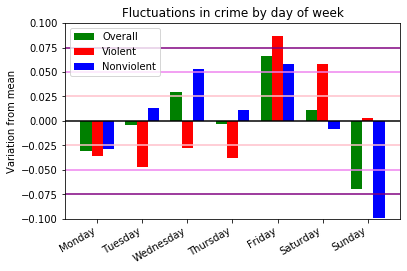

In [58]:
N = 7

ind = np.arange(N)
width = .25

fig, ax = plt.subplots()
rects1 = ax.bar(ind, dow_avg_diff, width, color='g', label='Overall')
rects2 = ax.bar(ind+width, dow_violent_avg_diff, width, color='r', label='Violent')
rects3 = ax.bar(ind+2*width, dow_nonviolent_avg_diff, width, color='b', label='Nonviolent')

# add some text for labels, title and axes ticks
ax.set_ylabel('Variation from mean')
ax.set_title('Fluctuations in crime by day of week')
ax.set_xticks(ind+width)
ax.set_xticklabels(days)
ax.axhline(0, color='black')
ax.axhline(0.025, color='pink')
ax.axhline(-0.025, color='pink')
ax.axhline(0.05, color='violet')
ax.axhline(-0.05, color='violet')
ax.axhline(0.075, color='purple')
ax.axhline(-0.075, color='purple')
fig.autofmt_xdate()

plt.ylim(-0.1,0.1)
plt.legend(loc='best')
plt.show()

## 아래 도표를 통해 다음 사항을 알 수 있음
# 금요일 : (평균 기준) Overall 범죄율이 약 5 % 이상 증가, Violent 범죄율이 약 7.5 % 이상 증가, Nonviolent 범죄율이 약 5 % 이상 증가
# 토요일 : (평균 기준) Violent 범죄율이 약 5 % 이상 증가
# 수요일 : (평균 기준) Violent 범죄율이 약 2.5 % 이상 감소, Nonviolent 범죄율이 약 5 % 이상 증가
# 일요일 : (평균 기준) Overall 범죄율이 약 5 % 이상 감소, Nonviolent 범죄율이 약 7.5 % 이상 감소
# 월요일 : (평균 기준) Overall, Violent, Nonviolent 범죄율이 약 2.5 % 이상 감소

# 시간대에 따른 violent / nonviolent 범죄 발생 추세 파악

18
54978
5
8609


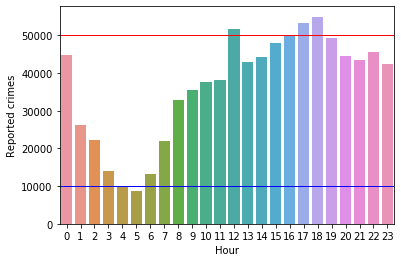

In [59]:
hour_series = train.groupby('Hour').count().iloc[:, 0]
sns.barplot(x=hour_series.index, y=hour_series);
plt.axhline(y=50000, color='r', linewidth=1) 
plt.axhline(y=10000, color='b', linewidth=1)
plt.ylabel('Reported crimes')

print(hour_series.idxmax())
print(hour_series.max())
print(hour_series.idxmin())
print(hour_series.min())

## 다음 도표는 시간대별 범죄 발생 건수에 대한 그래프로 다음 사항을 보여줌
# 새벽 5시에 범죄 발생 건수가 가장 적고, 오후 6시에 범죄 발생 건수가 가장 많음
# 새벽 5시를 시작으로 범죄 발생 건수가 높아지다가 새벽 6시 이후로 새벽 5시까지 범죄 발생 건수가 낮아지는 추세를 볼 수 있음
# 오후 12시의 범죄 발생 건수가 유독 많은 것에 대해 점심시간과 관련이 있을지도 모름

In [68]:
hour_series

Hour
0     44684
1     26125
2     22261
3     13988
4      9848
5      8609
6     13089
7     21965
8     32784
9     35440
10    37709
11    38272
12    51793
13    43059
14    44318
15    47920
16    50021
17    53417
18    54978
19    49354
20    44582
21    43533
22    45618
23    42359
Name: Dates, dtype: int64

In [60]:
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Date', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [84]:
violent_hours = [hour for hour in violent[:,13]]

In [75]:
violent_hours.count(1)

9767

In [65]:
violent_hours_freq = [violent_hours.count(a)/4148. for a in np.unique(violent_hours)]
print(violent_hours_freq)

# 4148 = (2014-2003)*365+(31+28+31+30+13)

[3.059546769527483, 2.354628736740598, 2.2495178399228544, 1.339440694310511, 0.9170684667309547, 0.7767598842815815, 0.9351494696239151, 1.3825940212150434, 2.162729026036644, 2.137897782063645, 2.187801350048216, 2.1675506268081004, 2.8784956605593055, 2.3129218900675026, 2.481677917068467, 2.841610414657666, 3.0453230472516877, 3.592092574734812, 3.9050144648023144, 3.501205400192864, 3.527242044358727, 3.596914175506268, 3.6463355834136935, 3.322565091610415]


In [66]:
nonviolent_hours = [hour for hour in nonviolent[:,13]]
print(nonviolent_hours)

[23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 23, 23, 23, 

In [67]:
nonviolent_hours.count(0)

31970

In [77]:
nonviolent_hours_freq = [nonviolent_hours.count(a)/4148. for a in np.unique(nonviolent_hours)]
print(nonviolent_hours_freq)

# 4148 = (2014-2003)*365+(31+28+31+30+13)

[7.707328833172613, 3.942864030858245, 3.116923818707811, 2.0327868852459017, 1.4570877531340405, 1.298457087753134, 2.2193828351012534, 3.9122468659594984, 5.739392478302796, 6.404050144648023, 6.902362584378014, 7.056412729026037, 9.60390549662488, 8.065091610414658, 8.20009643201543, 8.709257473481196, 9.012536162005786, 9.284956605593058, 9.347396335583413, 8.395853423336547, 7.218900675024108, 6.897058823529412, 7.349807135969142, 6.888138862102218]


C:\Users\assistant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


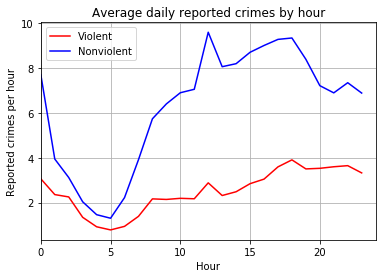

In [81]:
p1 = plt.plot(np.arange(24), violent_hours_freq, color='r')
p2 = plt.plot(np.arange(24), nonviolent_hours_freq, color='b')
plt.grid() # 윤곽선 그려줌
plt.title('Average daily reported crimes by hour')
plt.xlabel('Hour')
plt.ylabel('Reported crimes per hour')
plt.legend((p1[0],p2[0]),('Violent','Nonviolent'),loc='upper left')
ax = plt.subplot()
ax.set_xlim(0,24)

plt.show()

## 아래 도표를 통해 다음 사항을 알 수 있음
# 낮 시간에 Violent 범죄 발생 건수는 Nonviolent 범죄 발생 건수보다 뚜렷히 나타나지 않음
# → Nonviolent 범죄 발생 건수가 전체 범죄의 약 3/4를 차지하고 있으므로 왜곡된 것일수도 있음
# y축 : 시간당 범죄 발생 건수

C:\Users\assistant\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


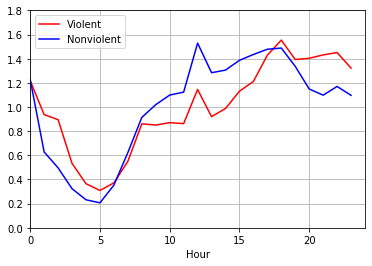

In [82]:
# Violent와 Nonviolent에 대해 각각의 평균으로 나누어서 가중효과 제거
violent_hours_freq_adj = [a/np.mean(violent_hours_freq) for a in violent_hours_freq]
nonviolent_hours_freq_adj = [a/np.mean(nonviolent_hours_freq) for a in nonviolent_hours_freq]
plt.grid() # 윤곽선 그려줌
p1 = plt.plot(np.arange(24), violent_hours_freq_adj, color='r')
p2 = plt.plot(np.arange(24), nonviolent_hours_freq_adj, color='b')
plt.xlabel('Hour')
plt.yticks(np.arange(0,2,.2))
plt.legend((p1[0],p2[0]),('Violent','Nonviolent'),loc='upper left')
ax = plt.subplot()
ax.set_xlim(0,24)

plt.show()

## 아래 도표를 통해 다음 사항을 알 수 있음
# y축 : 주어진 시간 동안의 평균 범죄 발생 건수에 대한 상대적 범죄 발생 증가량 